# Image Prediction of clothes

In [14]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

* Regression Loss Functions
    1. Mean Squared Error Loss
    2. Mean Squared Logarithmic Error Loss
    3. Mean Absolute Error Loss
* Binary Classification Loss Functions
    1. Binary Cross-Entropy
    2. Hinge Loss
    3. Squared Hinge Loss
* Multi-Class Classification Loss Functions
    1. Multi-Class Cross-Entropy Loss
    2. Sparse Multiclass Cross-Entropy Loss
    3. Kullback Leibler Divergence Loss

In [15]:
fashion = tf.keras.datasets.fashion_mnist
(X_train , y_train) , (X_test , y_test) = fashion.load_data()

In [16]:
# One image is of size 28X28 in tensor
print(X_train.shape , X_test.shape , y_train.shape , y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [17]:
# There is 60000 data in training & 10000 data in testing
print(y_train)

[9 0 0 ... 3 0 5]


In [18]:
# Label of clothes in order as 0,1,2...9
Clothes_label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
Unique = np.unique(y_train)
print(Unique)

[0 1 2 3 4 5 6 7 8 9]


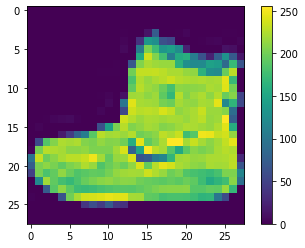

9


In [19]:
# To inntiate plotting
plt.figure()
# plot 1st image in training data
plt.imshow(X_train[0])
# To show colorbar in side
plt.colorbar()
plt.show()
print(y_train[0])

### Model - 1 (Base Model)

In [20]:
tf.random.set_seed(42)

# As input layer is 2D matrix to simplify it for machine we need to make it linear using flatten method
# As this is classification problem of 10 values we must keep last layer of 10 nodes
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
               optimizer = tf.keras.optimizers.Adam() , 
               metrics = ['accuracy'])

history = model_1.fit(X_train , y_train , epochs = 10 , validation_data = (X_test , y_test))

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.1608 - accuracy: 0.1639 - val_loss: 1.7971 - val_accuracy: 0.2073
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.7081 - accuracy: 0.2487 - val_loss: 1.6460 - val_accuracy: 0.2800
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6278 - accuracy: 0.2824 - val_loss: 1.6023 - val_accuracy: 0.2910
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6092 - accuracy: 0.2827 - val_loss: 1.5968 - val_accuracy: 0.2888
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5956 - accuracy: 0.2927 - val_loss: 1.5808 - val_accuracy: 0.3039
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5921 - accuracy: 0.3008 - val_loss: 1.5695 - val_accuracy: 0.3060
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 1.5806 - accuracy: 0.3111 - val_loss: 1.5695 - val_accuracy:

- Params value = (number of bias + no.of weights)
- no. of weights = (shape of previous layer) * (shape of current layer)
- no. of biases = (shape of current layer)

> E.g. - for this neural network lets consider info is travelling from 0th to 1st layer
> Then No. of weights = 784 * 4 = 3136
> No. of biases = 4
> Total parameters/variabels = (784*4) + 4 = 3136 + 4 = 3140

In [21]:
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 3140      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


### Model - 2 (Normalise Data)

In [22]:
# We can see that accuracy of model on testing data is 40%
# Let's try to give input as normalised data
# First let's find min and max value in matrix
X_train.min() , X_train.max()

(0, 255)

In [23]:
# As we can see data is in between 0 to 255
# We need to normalize it first
# Just by dividing data by 255 it will be normallised
X_train = X_train/255
X_test = X_test/255

In [24]:
print(X_test[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [25]:
# Let's try to implement same model on noramlised data
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) , 
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
               optimizer = tf.keras.optimizers.Adam() , 
               metrics = ['accuracy'])

norm_history = model_2.fit(X_train , y_train , epochs = 10 , validation_data = (X_test , y_test))

Epoch 1/10
1875/1875 [==============================] - 2s 811us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 1s 768us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 1s 754us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 1s 753us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 1s 758us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

Just by normalizing our data accuracy has been doubled. That's why its always good to normalize the data first

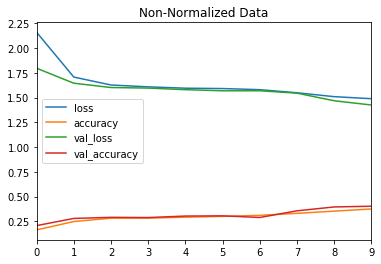

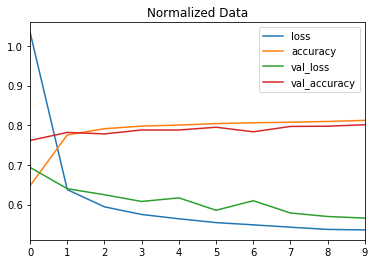

In [26]:
import pandas as pd
pd.DataFrame(history.history).plot(title = 'Non-Normalized Data')
pd.DataFrame(norm_history.history).plot(title = 'Normalized Data')

### Model - 3 (Find Optimal Learning rate)

In [30]:
# Let's find learning rate using previous method
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
               optimizer = tf.keras.optimizers.Adam() ,
               metrics = ['accuracy'])

lr_fn = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

history_3 = model_3.fit(X_train , y_train , epochs = 40 , validation_data = (X_test , y_test) ,
           callbacks = [lr_fn])

Epoch 1/40
1875/1875 [==============================] - 2s 854us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 1s 799us/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 2s 853us/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 1s 790us/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 2s 817us/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 2s 806us/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 1s 782us/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 -

Text(0.5, 1.0, 'Finding the ideal learning rate')

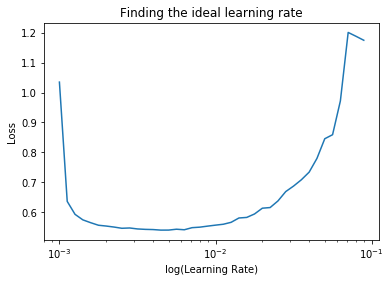

In [31]:
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs , history_3.history['loss'])
plt.xlabel('log(Learning Rate)')
plt.ylabel('Loss')
plt.title('Finding the ideal learning rate')

### Model - 3 (Use optimal learning rate)

In [32]:
# In this case, learning rate of our optimizer is almost same as default value
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

model_3.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() ,
               optimizer = tf.keras.optimizers.Adam(lr = 0.001) ,
               metrics = ['accuracy'])

history_3 = model_3.fit(X_train , y_train , epochs = 20 , validation_data = (X_test , y_test))

C:\Users\Tirth\Anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
1875/1875 [==============================] - 2s 771us/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 1s 726us/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 1s 751us/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 1s 742us/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 1s 754us/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 1s 743us/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 1s 765us/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 -

### Decide Value of epochs when value of loss is not changing

* The batch size is a number of samples processed before the model is updated.
* 1 <= batch_size <= len(training_data)

### Model - 4 (EarlyStopping)

In [35]:
# To decide epochs value by machine only we can use early stopping callback
# Monitor the value of loss and if value don't change for 5 consecutive iteration stop running
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss' , patience = 5)

# As this is classification problem of 10 values we must keep last layer of 10 nodes
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(4 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Do not use Multi-Class Cross-Entropy Loss in this model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
             optimizer = tf.keras.optimizers.Adam() , 
             metrics = ['accuracy'])

history_4 = model_4.fit(X_train , y_train , epochs = 90 , callbacks=[callback] , validation_data = (X_test , y_test))

Epoch 1/90
1875/1875 [==============================] - 2s 840us/step - loss: 1.1766 - accuracy: 0.5501 - val_loss: 0.8390 - val_accuracy: 0.6967
Epoch 2/90
1875/1875 [==============================] - 2s 806us/step - loss: 0.7418 - accuracy: 0.7356 - val_loss: 0.7360 - val_accuracy: 0.7377
Epoch 3/90
1875/1875 [==============================] - 1s 777us/step - loss: 0.6635 - accuracy: 0.7674 - val_loss: 0.6743 - val_accuracy: 0.7612
Epoch 4/90
1875/1875 [==============================] - 1s 775us/step - loss: 0.6280 - accuracy: 0.7834 - val_loss: 0.6537 - val_accuracy: 0.7779
Epoch 5/90
1875/1875 [==============================] - 1s 749us/step - loss: 0.6068 - accuracy: 0.7909 - val_loss: 0.6494 - val_accuracy: 0.7734
Epoch 6/90
1875/1875 [==============================] - 1s 777us/step - loss: 0.5960 - accuracy: 0.7951 - val_loss: 0.6414 - val_accuracy: 0.7810
Epoch 7/90
1875/1875 [==============================] - 1s 766us/step - loss: 0.5879 - accuracy: 0.7973 - val_loss: 0.6110 -

Epoch 57/90
1875/1875 [==============================] - 2s 812us/step - loss: 0.5336 - accuracy: 0.8149 - val_loss: 0.6027 - val_accuracy: 0.7969
Epoch 58/90
1875/1875 [==============================] - 2s 803us/step - loss: 0.5354 - accuracy: 0.8146 - val_loss: 0.6028 - val_accuracy: 0.7934
Epoch 59/90
1875/1875 [==============================] - 1s 786us/step - loss: 0.5343 - accuracy: 0.8144 - val_loss: 0.5975 - val_accuracy: 0.7986
Epoch 60/90
1875/1875 [==============================] - 1s 797us/step - loss: 0.5339 - accuracy: 0.8156 - val_loss: 0.5939 - val_accuracy: 0.7993
Epoch 61/90
1875/1875 [==============================] - 1s 795us/step - loss: 0.5332 - accuracy: 0.8151 - val_loss: 0.6173 - val_accuracy: 0.7886
Epoch 62/90
1875/1875 [==============================] - 1s 798us/step - loss: 0.5331 - accuracy: 0.8155 - val_loss: 0.5931 - val_accuracy: 0.7989
Epoch 63/90
1875/1875 [==============================] - 2s 819us/step - loss: 0.5341 - accuracy: 0.8152 - val_loss: 0

In [36]:
def plot_image(i , prediction , true_value , img):
#     True label & image of ith product can be found this way
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     Plot image
    plt.imshow(img , cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)

#     If predicted value is same as original value than give color accordingly
    if predicted_label == true_value:
        color = 'blue'
    else:
        color = 'red'
        
    plt.xlabel('{} {:2.0f}% ({})'.format(Clothes_label[predicted_label] ,
                                        100 * np.max(prediction) ,
                                        Clothes_label[true_value]),
                                          color = color)    

In [37]:
def plot_value_array(i, prediction , true_value):
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction , color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction)

    thisplot[predicted_label].set_color('red')
    thisplot[true_value].set_color('blue')

In [38]:
probability_model = tf.keras.Sequential([model_4 , 
                                         tf.keras.layers.Softmax()])

In [39]:
# Prediction with respect to probability
# It will give probability of product like 
# For image-1 98% it is shoe , and 2% chances are of shirt or something
predictions = probability_model.predict(X_test)

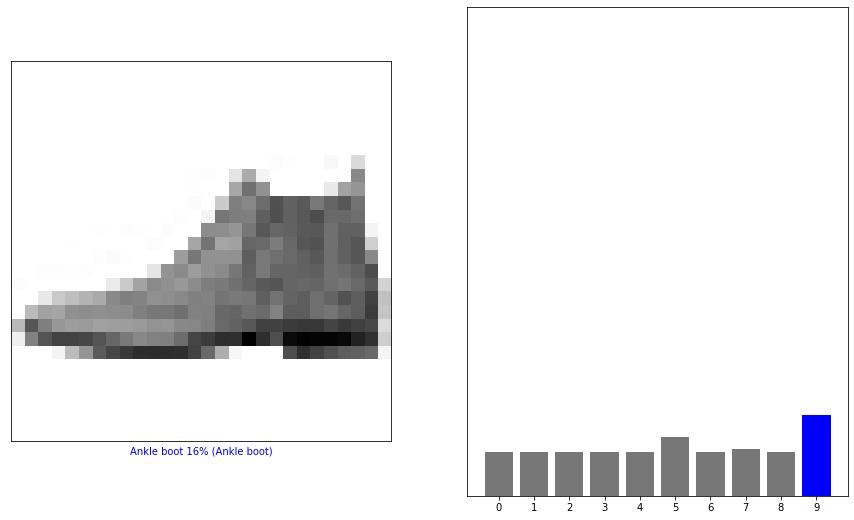

In [40]:
i = 0
plt.figure(figsize=(15,9))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test[i] , X_test[i])
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test[i])
plt.show()

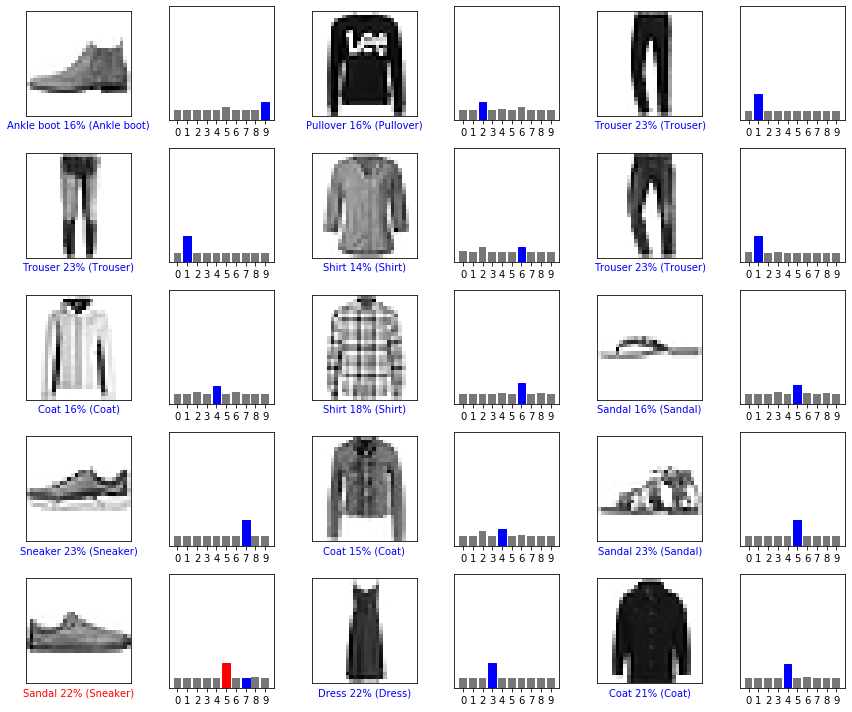

In [41]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_test[i] , X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_test[i])
plt.tight_layout()
plt.show()

### Model - 5 (Add layers)

In [42]:
# To decide epochs value by machine only we can use early stopping callback
# Monitor the value of loss and if value don't change for 3 consecutive iteration stop running
callback = tf.keras.callbacks.EarlyStopping(monitor = 'loss' , patience = 3)

# As this is classification problem of 10 values we must keep last layer of 10 nodes
model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(6 , activation = 'relu') ,
    tf.keras.layers.Dense(6 , activation = 'relu') ,
    tf.keras.layers.Dense(6 , activation = 'relu') ,
    tf.keras.layers.Dense(6 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Do not use Multi-Class Cross-Entropy Loss in this model
model_4.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
             optimizer = tf.keras.optimizers.Adam(lr = 0.001) , 
             metrics = ['accuracy'])

history_4 = model_4.fit(X_train , y_train , epochs = 90 , callbacks=[callback] , validation_data = (X_test , y_test))

Epoch 1/90
1875/1875 [==============================] - 2s 868us/step - loss: 1.0511 - accuracy: 0.6097 - val_loss: 0.7019 - val_accuracy: 0.7574
Epoch 2/90
1875/1875 [==============================] - 2s 830us/step - loss: 0.6252 - accuracy: 0.7824 - val_loss: 0.6023 - val_accuracy: 0.7874
Epoch 3/90
1875/1875 [==============================] - 2s 887us/step - loss: 0.5503 - accuracy: 0.8063 - val_loss: 0.5472 - val_accuracy: 0.8077
Epoch 4/90
1875/1875 [==============================] - 2s 907us/step - loss: 0.5181 - accuracy: 0.8182 - val_loss: 0.5332 - val_accuracy: 0.8148
Epoch 5/90
1875/1875 [==============================] - 2s 864us/step - loss: 0.4984 - accuracy: 0.8256 - val_loss: 0.5130 - val_accuracy: 0.8194
Epoch 6/90
1875/1875 [==============================] - 2s 907us/step - loss: 0.4806 - accuracy: 0.8312 - val_loss: 0.5370 - val_accuracy: 0.8100
Epoch 7/90
1875/1875 [==============================] - 2s 891us/step - loss: 0.4726 - accuracy: 0.8332 - val_loss: 0.5135 -

In [43]:
probability_model_2 = tf.keras.Sequential([model_4 , 
                                         tf.keras.layers.Softmax()])

In [44]:
predictions_2 = probability_model_2.predict(X_test)

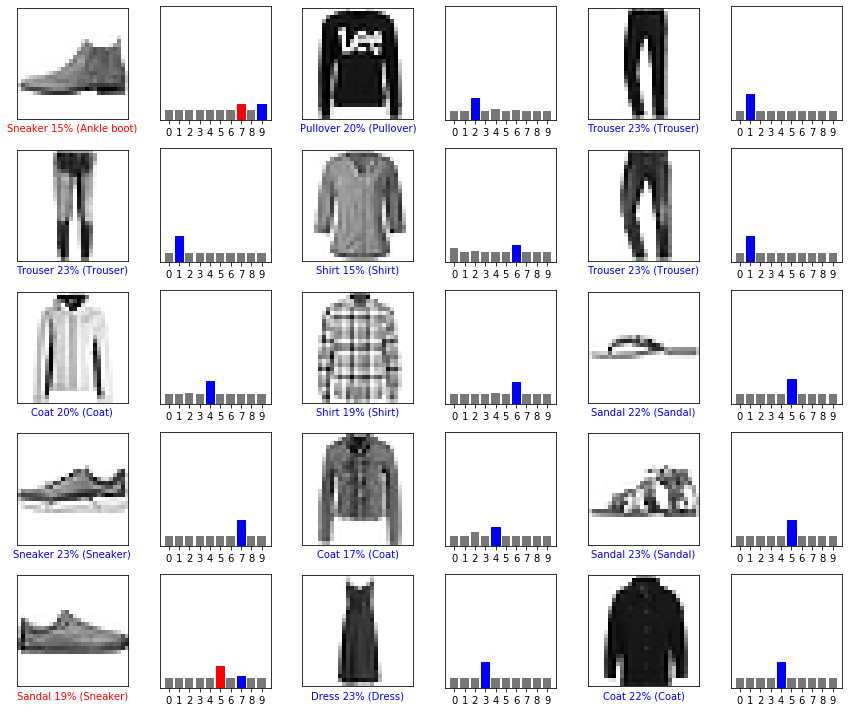

In [45]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_2[i], y_test[i] , X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_2[i], y_test[i])
plt.tight_layout()
plt.show()

### Model - 6 (Add nodes in hidden layers)

In [47]:
# Here we can see that although our model is having great accuracy. It is not predicting output with accuracy.
# This means we need to add more nodes in each layer to have ouput with more precision.
model_5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(20 , activation = 'relu') ,
    tf.keras.layers.Dense(20 , activation = 'relu') ,
    tf.keras.layers.Dense(20 , activation = 'relu') ,
    tf.keras.layers.Dense(20 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'softmax')
])

# Do not use Multi-Class Cross-Entropy Loss in this model
model_5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
             optimizer = tf.keras.optimizers.Adam(lr = 0.001) , 
             metrics = ['accuracy'])

history_5 = model_5.fit(X_train , y_train , epochs = 30 , validation_data = (X_test , y_test))

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6536 - accuracy: 0.7703 - val_loss: 0.5018 - val_accuracy: 0.8249
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4558 - accuracy: 0.8404 - val_loss: 0.5009 - val_accuracy: 0.8251
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4128 - accuracy: 0.8541 - val_loss: 0.4489 - val_accuracy: 0.8353
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3878 - accuracy: 0.8613 - val_loss: 0.4364 - val_accuracy: 0.8428
Epoch 5/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3737 - accuracy: 0.8651 - val_loss: 0.4192 - val_accuracy: 0.8458
Epoch 6/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3594 - accuracy: 0.8710 - val_loss: 0.4203 - val_accuracy: 0.8437
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3491 - accuracy: 0.8739 - val_loss: 0.4271 - val_accuracy:

In [49]:
probability_model_3 = tf.keras.Sequential([model_5 , 
                                         tf.keras.layers.Softmax()])
predictions_3 = probability_model_3.predict(X_test)

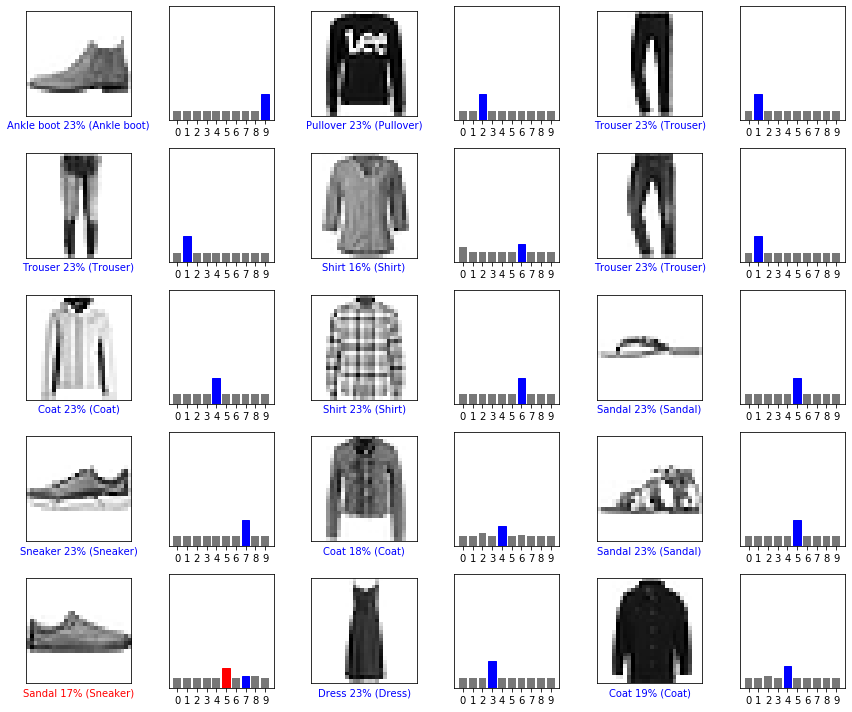

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_3[i], y_test[i] , X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_3[i], y_test[i])
plt.tight_layout()
plt.show()

### Model - 7 (Reduce number of layers & Increase number of nodes)

In [52]:
# As this is classification problem of 10 values we must keep last layer of 10 nodes
model_6 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28 , 28)) ,
    tf.keras.layers.Dense(100 , activation = 'relu') ,
    tf.keras.layers.Dense(10 , activation = 'sigmoid')
])

# Do not use Multi-Class Cross-Entropy Loss in this model
model_6.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy() , 
             optimizer = tf.keras.optimizers.SGD(lr = 0.001) , 
             metrics = ['accuracy'])

history_6 = model_6.fit(X_train , y_train , epochs = 100 , validation_data = (X_test , y_test))

Epoch 1/100
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4212 - accuracy: 0.5901 - val_loss: 1.0427 - val_accuracy: 0.6753
Epoch 2/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.9084 - accuracy: 0.7183 - val_loss: 0.8394 - val_accuracy: 0.7280
Epoch 3/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7740 - accuracy: 0.7553 - val_loss: 0.7532 - val_accuracy: 0.7516
Epoch 4/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.7040 - accuracy: 0.7762 - val_loss: 0.6976 - val_accuracy: 0.7678
Epoch 5/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6583 - accuracy: 0.7890 - val_loss: 0.6597 - val_accuracy: 0.7792
Epoch 6/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.6249 - accuracy: 0.7987 - val_loss: 0.6326 - val_accuracy: 0.7897
Epoch 7/100
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5994 - accuracy: 0.8052 - val_loss: 0.6107 - val_ac

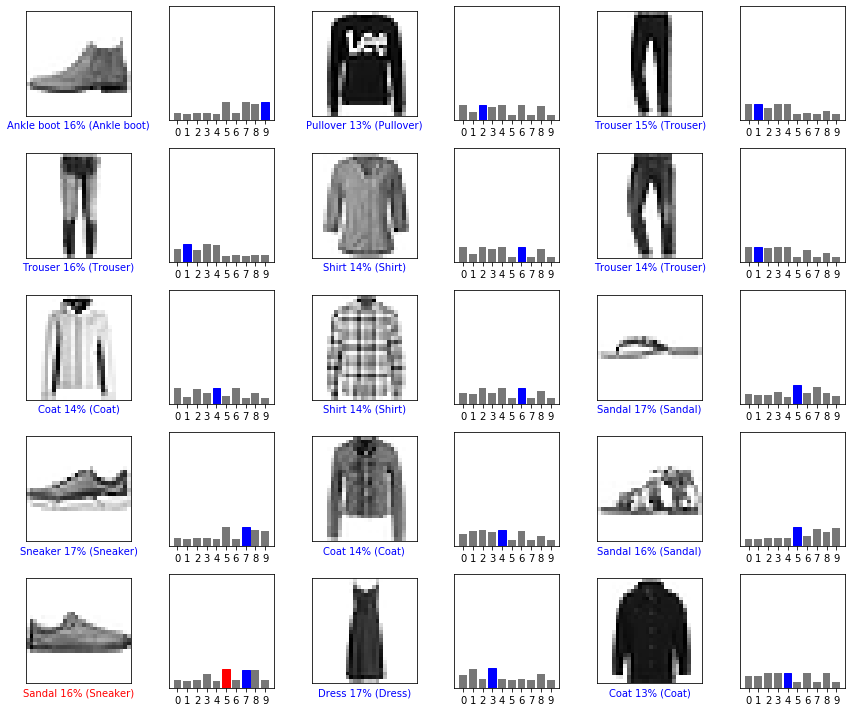

In [54]:
probability_model_4 = tf.keras.Sequential([model_6 , 
                                         tf.keras.layers.Softmax()])
predictions_4 = probability_model_4.predict(X_test)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_4[i], y_test[i] , X_test[i])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_4[i], y_test[i])
plt.tight_layout()
plt.show()